## Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("heart_cleveland_upload.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [6]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
29,62,1,1,128,208,1,2,140,0,0.0,0,0,0,0
76,68,1,2,180,274,1,2,150,1,1.6,1,0,2,1
56,45,0,1,130,234,0,2,175,0,0.6,1,0,0,0
170,65,0,3,150,225,0,2,114,0,1.0,1,3,2,1
79,67,0,2,115,564,0,2,160,0,1.6,1,0,2,0


In [7]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


In [8]:
# Drop irrelevant or duplicate columns
df.drop_duplicates(inplace=True)

In [10]:
print("Data types and non-null info:")
df.info()


Data types and non-null info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


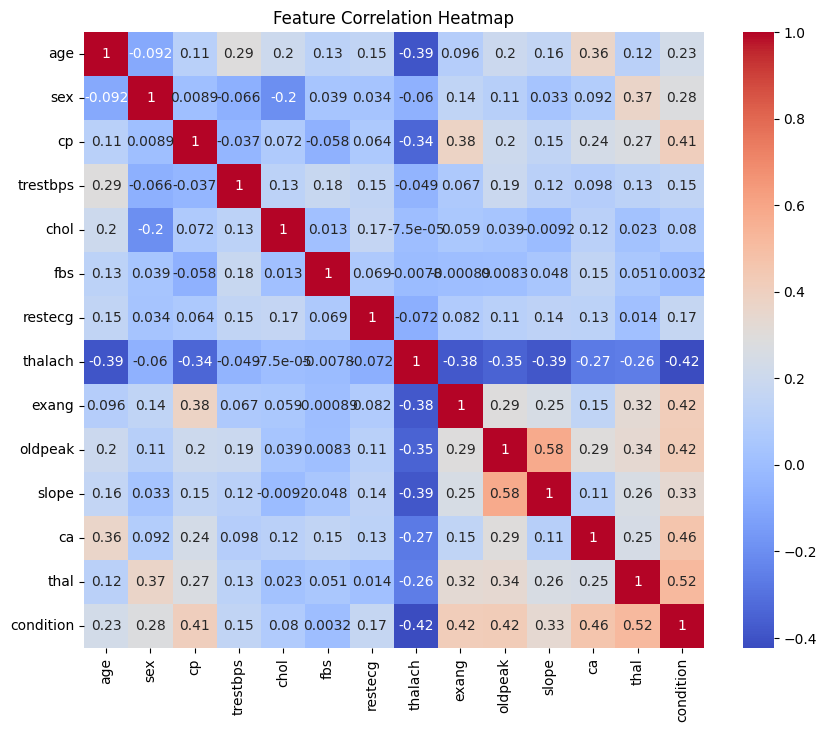

In [11]:
# Exploratory Data Analysis
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

In [14]:
# Feature Selection
X = df.drop('condition', axis=1)
y = df['condition']  

# target = 1 means heart disease, 0 = no disease

In [15]:
y.value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [16]:
# Split into training and test sets

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((237, 13), (60, 13), (237,), (60,))

In [17]:
#  Feature Scaling

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
# Train the Decision Tree Classifier

dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

dt_model.fit(X_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


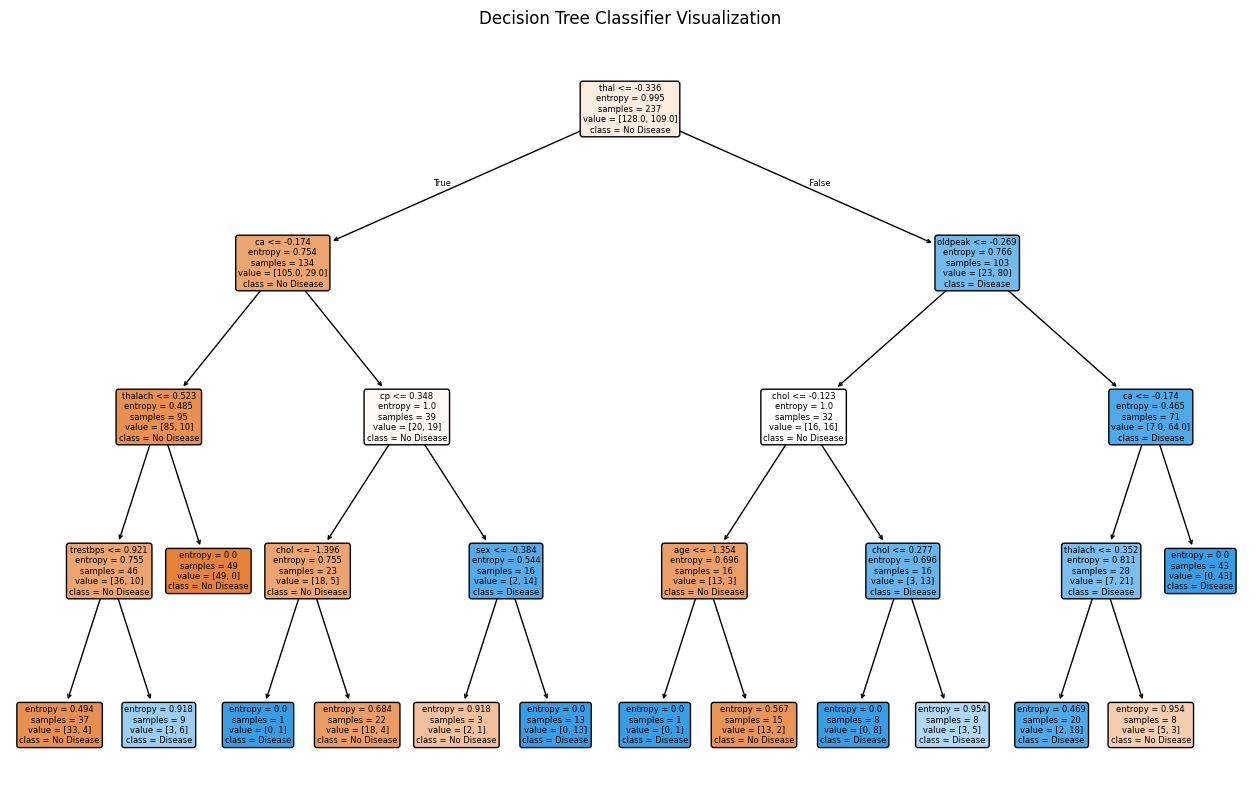

In [34]:
# Model Visualization

plt.figure(figsize=(16, 10))
plot_tree(
    dt_model,
    filled=True,
    rounded=True,
    class_names=["No Disease", "Disease"],
    feature_names=X.columns
)

plt.title("Decision Tree Classifier Visualization")
plt.show()

In [35]:
# Model Evaluation


# Predict on test set
y_pred = dt_model.predict(X_test)

In [36]:
y_pred

array([1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [37]:
# Accuracy Score
print("Accuracy on test data:", accuracy_score(y_test, y_pred))

Accuracy on test data: 0.65


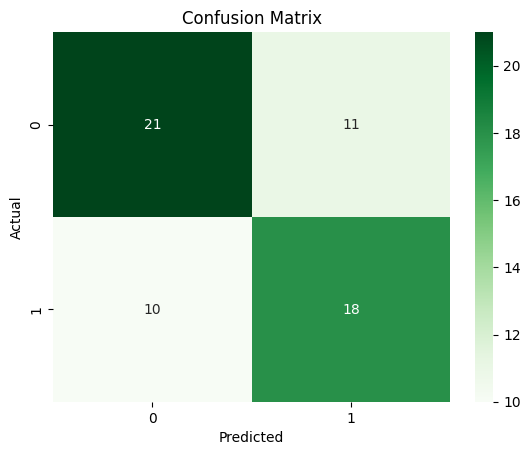

In [38]:
# Confusion Matrix


conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [39]:
# Classification Report

print("Classification Report:")

print(classification_report(y_test, y_pred, target_names=["No Disease", "Disease"]))

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.68      0.66      0.67        32
     Disease       0.62      0.64      0.63        28

    accuracy                           0.65        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.65      0.65      0.65        60



In [43]:
# Gini, Entropy, and Info Gain (Manual)


# Gini Function
def calculate_gini(labels):
    probs = labels.value_counts(normalize=True)
    return 1 - sum(p**2 for p in probs)

In [49]:
from math import log2

In [50]:
# Entropy Function
def calculate_entropy(labels):
    probs = labels.value_counts(normalize=True)
    return -sum(p * log2(p) for p in probs if p > 0)


In [51]:
# Split by 'sex' feature (as example)
col_index = X.columns.get_loc('sex')
group0 = y_train[np.array(X_train)[:, col_index] == 0]
group1 = y_train[np.array(X_train)[:, col_index] == 1]

In [52]:
# Calculate weighted Gini and Entropy after split
n = len(y_train)
n0, n1 = len(group0), len(group1)

In [53]:
# Gini and Entropy before split


gini_parent = calculate_gini(y_train)
entropy_parent = calculate_entropy(y_train)

gini_split = (n0/n)*calculate_gini(group0) + (n1/n)*calculate_gini(group1)
entropy_split = (n0/n)*calculate_entropy(group0) + (n1/n)*calculate_entropy(group1)
info_gain = entropy_parent - entropy_split

print("\nManual Metrics (split on 'sex')")
print("Gini (parent):", gini_parent)
print("Gini (split):", gini_split)
print("Entropy (parent):", entropy_parent)
print("Entropy (split):", entropy_split)
print("Information Gain (split on 'sex'):", info_gain)


Manual Metrics (split on 'sex')
Gini (parent): 0.4967864836475637
Gini (split): 0.0
Entropy (parent): 0.9953588969966347
Entropy (split): 0.0
Information Gain (split on 'sex'): 0.9953588969966347


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5832\2000314920.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='coolwarm')


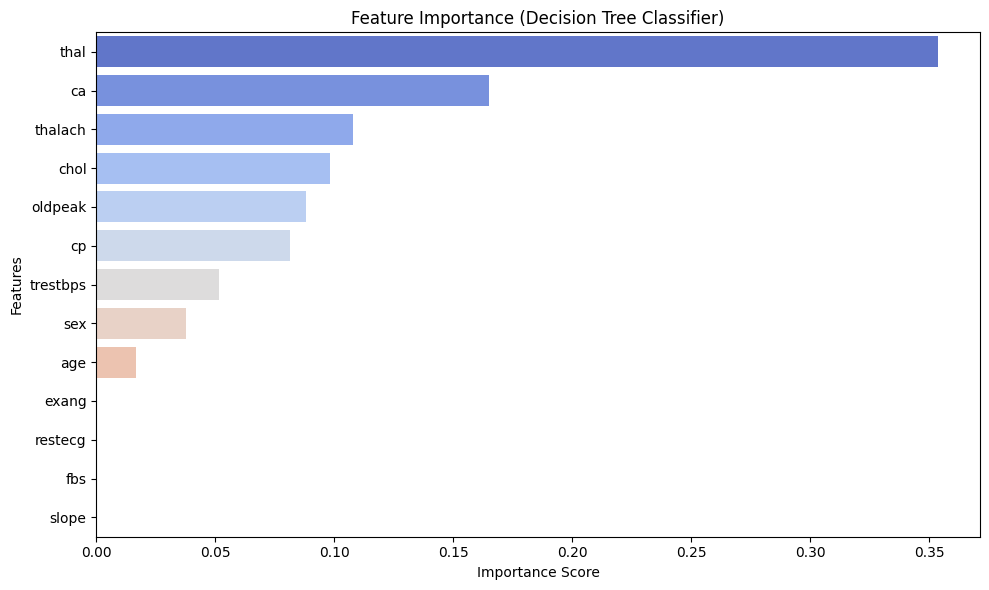

In [54]:
# Feature Importance Visualization

importances = dt_model.feature_importances_
features = X.columns

# Create a DataFrame for easy plotting

importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='coolwarm')
plt.title("Feature Importance (Decision Tree Classifier)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## Decision Tree Regressor

In [57]:
# Import libraries


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [59]:
df=pd.read_csv("housing_decisionTreeReg.csv")

In [60]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [61]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [63]:
#  Handle Missing Values

print("\nMissing values:\n", df.isnull().sum())




Missing values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [64]:
# Drop rows with missing values
df.dropna(inplace=True)

In [65]:
# Convert categorical 'ocean_proximity' to numeric via one-hot encoding

df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)

In [66]:
# Feature and Target Split

X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

In [67]:
# Step 5: Train-Test Split & Scaling

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [69]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16346, 12), (4087, 12), (16346,), (4087,))

In [70]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
X_train,print ("\n"), X_test

(array([[-1.10651441,  0.78620804, -1.16206244, ..., -0.01354861,
         -0.35636982, -0.38540693],
        [-0.02467137,  0.46787317,  0.34865716, ..., -0.01354861,
         -0.35636982, -0.38540693],
        [ 0.75804456, -0.71183841, -0.2874353 , ..., -0.01354861,
         -0.35636982, -0.38540693],
        ...,
        [ 0.5785683 , -0.76333376,  1.06426118, ..., -0.01354861,
         -0.35636982, -0.38540693],
        [-1.22616525,  0.90324292, -1.32108555, ..., -0.01354861,
          2.80607376, -0.38540693],
        [-1.42059787,  0.97814524,  1.85937675, ..., -0.01354861,
          2.80607376, -0.38540693]]),
 None,
 array([[ 1.16685161, -1.33446397, -0.68499309, ..., -0.01354861,
         -0.35636982,  2.59466012],
        [-0.85225636,  1.10922431, -2.11620113, ..., -0.01354861,
         -0.35636982, -0.38540693],
        [ 0.71816095, -0.80546631,  0.18963404, ..., -0.01354861,
         -0.35636982, -0.38540693],
        ...,
        [ 0.27445574, -0.15007099, -1.32108555,

In [82]:
# Step 6: Train Decision Tree Regressor

regressor = DecisionTreeRegressor(max_depth=3, random_state=42)
regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [83]:
# Step 7: Evaluate Model

y_pred = regressor.predict(X_test)

In [84]:
print("Regression Metrics ")
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

Regression Metrics 
R² Score: 0.5608383930198847
MAE: 56884.449821708586
MSE: 6005614369.744741
RMSE: 77495.89905114168


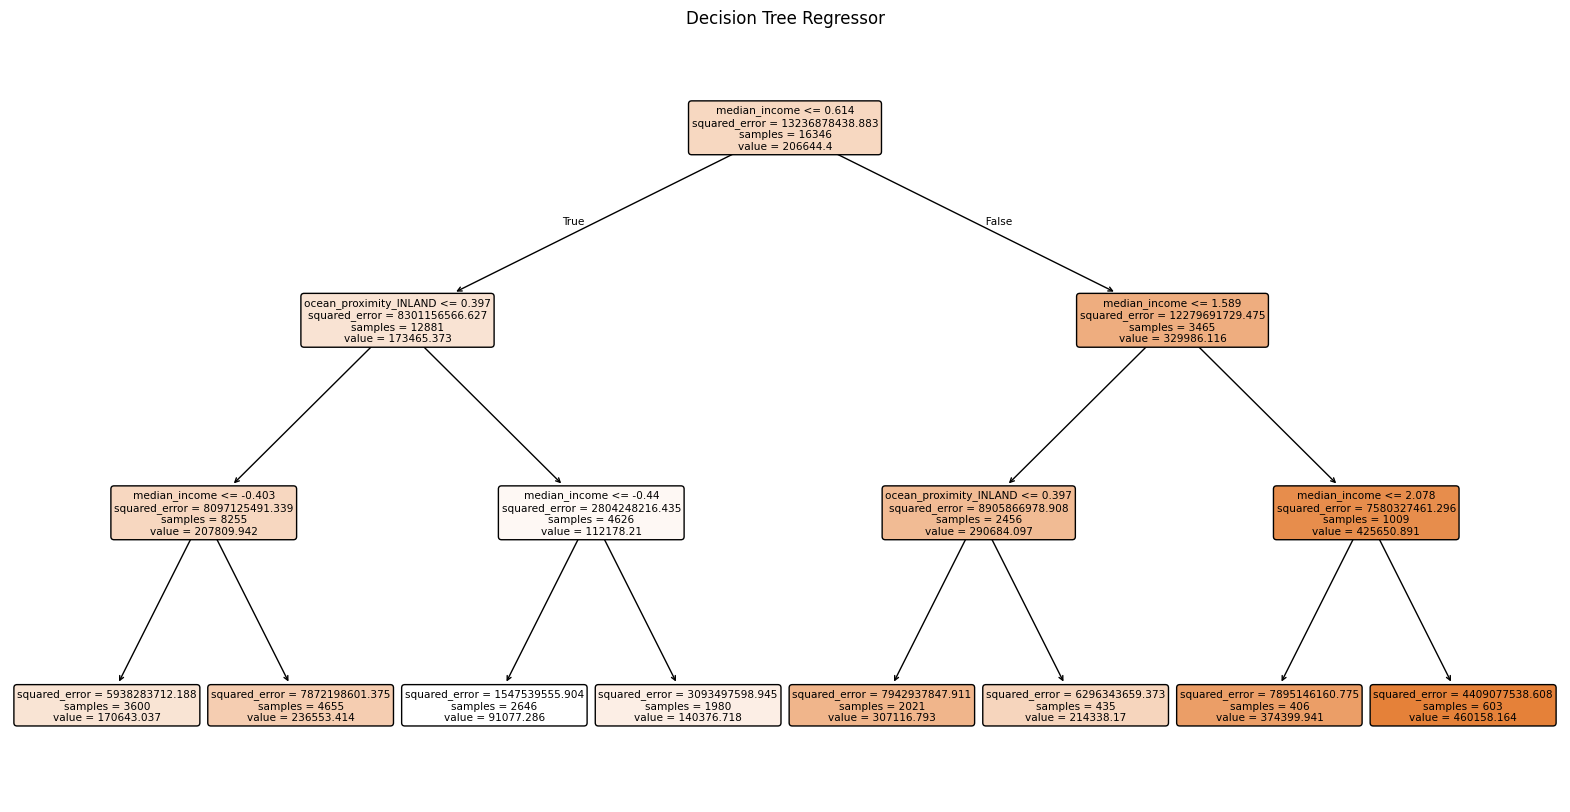

In [85]:
# Step 8: Visualize the Tree

plt.figure(figsize=(20, 10))
plot_tree(
    regressor,
    filled=True,
    feature_names=X.columns,
    rounded=True
)
plt.title("Decision Tree Regressor")
plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_5832\10741633.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Blues_r')


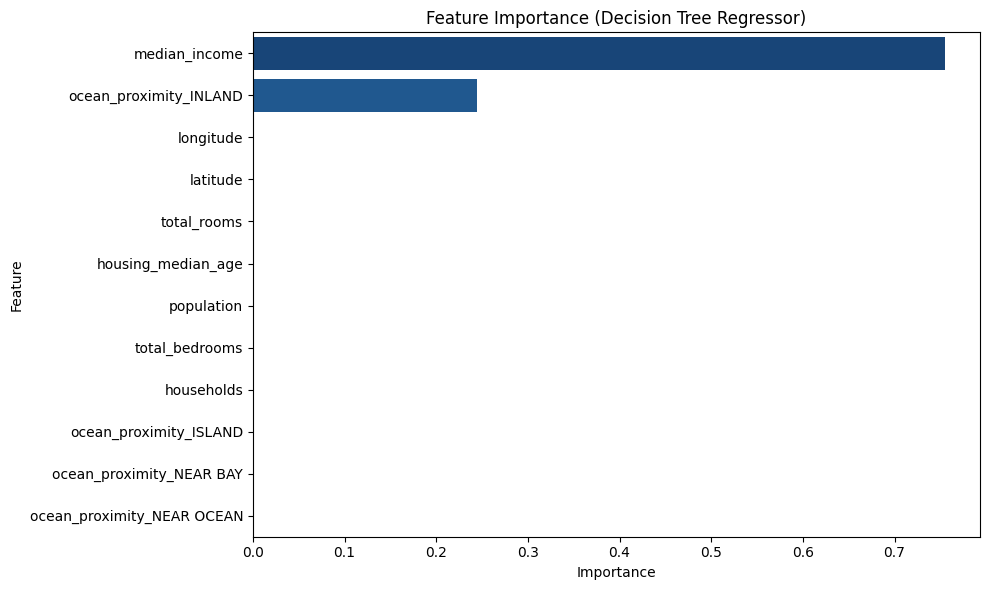

In [86]:
# Step 9: Feature Importance

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': regressor.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='Blues_r')
plt.title("Feature Importance (Decision Tree Regressor)")
plt.tight_layout()
plt.show()